In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Partie A Importing, cleaning and numerical summaries

In [44]:
# 1 Download the data set data.csv from the Resources tab
# 2 Import the data as a pandas DataFrame
data = pd.read_csv('data.csv')

In [45]:
# 3 Check the number of observations.
data.shape[0]
# 153 entries or observations (0-152)

153

In [46]:
# 4 Obtain the column headings
data.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


In [47]:
# 5 Check the data type for each column
data.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [48]:
# 6 Check if there are any missing values
data.info()
# Job Satisfaction : 2 missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [49]:
# 7 If necessary remove any observations to ensure that there 
# are no missing values and the values in each column are of the same data type.
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 152
Data columns (total 12 columns):
Country             151 non-null object
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 15.3+ KB


In [50]:
# 8 Obtain the mean minimum and maximum value for each column containing numerical data.
mean = data.loc[:,'Happiness Rank':'Job Satisfaction'].apply(np.mean, axis = 0); mean

Happiness Rank      77.827815
Happiness Score      5.357874
Economy              0.983895
Family               1.190509
Health               0.550794
Freedom              0.409805
Generosity           0.244914
Corruption           0.123008
Dystopia             1.854910
Job Satisfaction    75.209934
dtype: float64

In [51]:
maximum = data.loc[:,'Happiness Rank':'Job Satisfaction'].apply(np.max, axis = 0); maximum

Happiness Rank      155.000000
Happiness Score       7.537000
Economy               1.870766
Family                1.610574
Health                0.949492
Freedom               0.658249
Generosity            0.838075
Corruption            0.464308
Dystopia              3.117485
Job Satisfaction     95.100000
dtype: float64

In [52]:
minimum = data.loc[:,'Happiness Rank':'Job Satisfaction'].apply(np.min, axis = 0); minimum

Happiness Rank       1.000000
Happiness Score      2.693000
Economy              0.000000
Family               0.000000
Health               0.000000
Freedom              0.000000
Generosity           0.000000
Corruption           0.000000
Dystopia             0.377914
Job Satisfaction    44.400000
dtype: float64

In [53]:
# 9 List the 10 happiest countries.
data.set_index('Country', inplace = True)

In [54]:
data.loc[data['Happiness Rank'] <= 10 ,'Happiness Rank']

Country
Norway          1
Denmark         2
Iceland         3
Switzerland     4
Finland         5
Netherlands     6
Canada          7
New Zealand     8
Sweden          9
Australia      10
Name: Happiness Rank, dtype: int64

In [55]:
# 10 List the 10 least happy countries.
data.loc[data['Happiness Rank'] >= maximum.loc['Happiness Rank'] - 10  ,'Happiness Rank']

Country
Haiti                       145
Yemen                       146
Liberia                     148
Guinea                      149
Togo                        150
Rwanda                      151
Syria                       152
Tanzania                    153
Burundi                     154
Central African Republic    155
Name: Happiness Rank, dtype: int64

# Partie B Indexing and grouping

In [56]:
# 1 Use the column 'Region' to create a separate DataFrame containing the data points from each of the six regions: 
#   North America, Latin America, Western Europe, Eastern Europe, Asia Pacific, Africa.

# First we get all different unique index of the column Region
Region = data.Region.unique()

# Store a dataFram corresponding to each region as element of a list
dataRegion = list()
for i in list(range(len(Region))):
    dataRegion.append(data.loc[data.Region == Region[i], :]) 

In [57]:
# 2 Compute the mean happiness score for each region and rank the regions from most happy to least happy. 

regionMeanHappinessScore = list()
for i in list(range(len(Region))):
    regionMeanHappinessScore.append(getattr(dataRegion[i], 'Happiness Score').mean(axis=0))

dfRegionMeanHappinessScore = pd.DataFrame( {'Region' : Region,
                    'Mean Happiness Score' : regionMeanHappinessScore})
dfRegionMeanHappinessScore.set_index('Region', inplace = True) 
dfRegionMeanHappinessScore.sort_values('Mean Happiness Score', ascending=False)

,Mean Happiness Score
Region,
North America,7.154500
Western Europe,6.880474
Latin America,5.957818
Eastern Europe,5.498952
Asia-Pacific,5.358326
Africa,4.254581
Europe,4.096000


In [58]:
# 3 Compute the number of countries in each region that have a happiness score above 6.0.
numberHappinessScoreRegion = list()

for i in list(range(len(Region))):
    numberHappinessScoreRegion.append(len(getattr(dataRegion[i][getattr(dataRegion[i], 'Happiness Score') > 6],'Happiness Score')))

In [59]:
dfNumberHappinessScoreRegion = pd.DataFrame( {'Region' : Region,
                    'nb MHS > 6' : numberHappinessScoreRegion})
dfNumberHappinessScoreRegion.set_index('Region', inplace = True)
dfNumberHappinessScoreRegion

,nb MHS > 6
Region,
Western Europe,17
North America,2
Asia-Pacific,11
Latin America,13
Eastern Europe,1
Africa,0
Europe,0


In [60]:
#  4 Compute the difference between the maximum and minimum happiness score for each region. 
#    Which region has the largest range of happiness scores?

rangeHappinessScoreRegion = list()

for i in list(range(len(Region))):
    rangeHappinessScoreRegion.append(getattr(dataRegion[i], 'Happiness Score').max(axis=0) - getattr(dataRegion[i], 'Happiness Score').min(axis=0))
    
dfRangeHappinessScoreRegion = pd.DataFrame( {'Region' : Region,
                    'Max - Min' : rangeHappinessScoreRegion})
dfRangeHappinessScoreRegion.set_index('Region', inplace = True)
dfRangeHappinessScoreRegion

,Max - Min
Region,
Western Europe,2.342
North America,0.323
Asia-Pacific,3.852
Latin America,3.476
Eastern Europe,1.454
Africa,3.179
Europe,0.000


# Partie C Bar plot of the Happiness Score

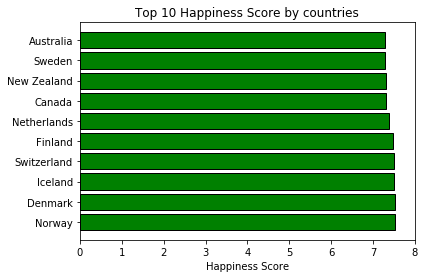

In [61]:
# 1 Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. 
#   Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis 
#   should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.
HappyCountryScore = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Happiness Score'])
HappyCountry = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Happiness Score'].index)
yCor = np.arange(len(HappyCountry))

plt.barh(yCor, HappyCountryScore, align = 'center',color = 'green', edgecolor ='black' )
plt.yticks(yCor, HappyCountry)
plt.title('Top 10 Happiness Score by countries')
plt.xlabel('Happiness Score')
plt.xlim(0,8)
plt.show()


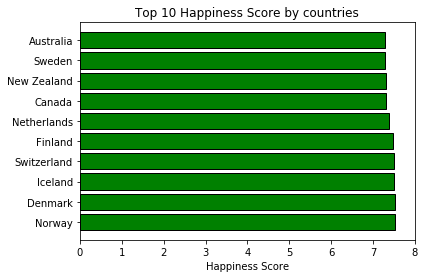

In [62]:
# 1 Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. 
#   Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis 
#   should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.
HappyCountryScore = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Happiness Score'])
HappyCountry = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Happiness Score'].index)
yCor = np.arange(len(HappyCountry))

fig, ax = plt.subplots()
ax.set_yticks(yCor)
ax.set_yticklabels(HappyCountry)
ax.barh(yCor, HappyCountryScore, align = 'center',color = 'green', edgecolor ='black' )
ax.set_title('Top 10 Happiness Score by countries')
ax.set_xlabel('Happiness Score')
ax.set_xlim(0,8)
plt.show()


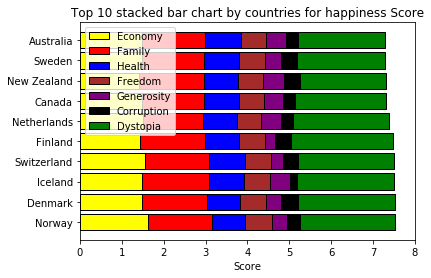

In [63]:
# 2 You will now modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is 
#   divided into the seven parts corresponding to the columns:
#    -Economy
#    -Family
#    -Health
#    -Freedom
#    -Generosity
#    -Corruption
#    -Dystopia Choose a distinct color for each category and include an appropriate legend with your chart.

# Creating the array for each parts
HappyCountryEconomy = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Economy'])
HappyCountryFamily = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Family'])
HappyCountryHealth = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Health'])
HappyCountryFreedom = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Freedom'])
HappyCountryGenerosity = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Generosity'])
HappyCountryCorruption = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Corruption'])
HappyCountryDystopia = np.array(data.loc[data['Happiness Rank'] <= 10 ,'Dystopia'])

plt.barh(yCor, HappyCountryEconomy, align = 'center',color = 'yellow', edgecolor ='black',
        label = 'Economy')

plt.barh(yCor, HappyCountryFamily, align = 'center',color = 'red', edgecolor ='black', 
        left = HappyCountryEconomy,
        label = 'Family')

plt.barh(yCor, HappyCountryHealth, align = 'center',color = 'blue', edgecolor ='black',
        left = HappyCountryEconomy + HappyCountryFamily,
        label = 'Health')

plt.barh(yCor, HappyCountryFreedom, align = 'center',color = 'brown', edgecolor ='black',
        left = HappyCountryEconomy + HappyCountryFamily + HappyCountryHealth,
        label = 'Freedom')

plt.barh(yCor, HappyCountryGenerosity, align = 'center',color = 'purple', edgecolor ='black',
        left = HappyCountryEconomy + HappyCountryFamily + HappyCountryHealth + HappyCountryFreedom,
        label = 'Generosity')

plt.barh(yCor, HappyCountryCorruption, align = 'center',color = 'black', edgecolor ='black',
        left = HappyCountryEconomy + HappyCountryFamily + HappyCountryHealth + HappyCountryFreedom + HappyCountryGenerosity,
        label = 'Corruption')

plt.barh(yCor, HappyCountryDystopia, align = 'center',color = 'green', edgecolor ='black',
        left = HappyCountryEconomy + HappyCountryFamily + HappyCountryHealth + HappyCountryFreedom + HappyCountryGenerosity + HappyCountryCorruption,
        label = 'Dystopia')

plt.legend(loc="upper left")
plt.yticks(yCor, HappyCountry)
plt.title('Top 10 stacked bar chart by countries for happiness Score')
plt.xlabel('Score')
plt.xlim(0,8)
plt.show()

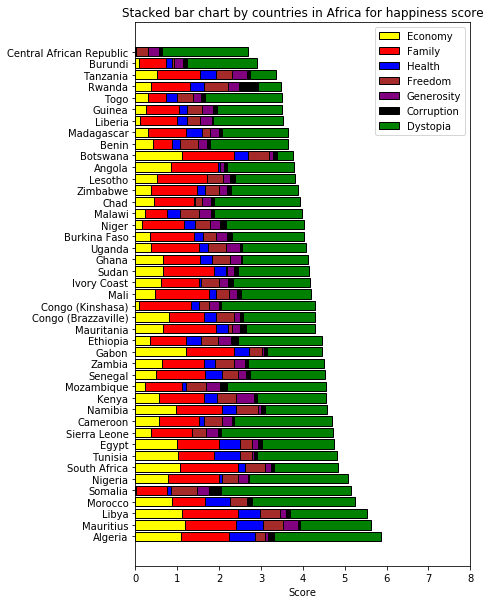

In [64]:
# 3 Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider 
# all countries from the region Africa.

# Creating the array for each parts
AfricaCountryEconomy = np.array(data.loc[data['Region'] == 'Africa', 'Economy'])
AfricaCountryFamily = np.array(data.loc[data['Region'] == 'Africa', 'Family'])
AfricaCountryHealth = np.array(data.loc[data['Region'] == 'Africa', 'Health'])
AfricaCountryFreedom = np.array(data.loc[data['Region'] == 'Africa', 'Freedom'])
AfricaCountryGenerosity = np.array(data.loc[data['Region'] == 'Africa', 'Generosity'])
AfricaCountryCorruption = np.array(data.loc[data['Region'] == 'Africa', 'Corruption'])
AfricaCountryDystopia = np.array(data.loc[data['Region'] == 'Africa', 'Dystopia'])

AfricaCountry = np.array(data.loc[data['Region'] == 'Africa'].index)
AfyCor = np.arange(len(AfricaCountry))

fig, ax = plt.subplots()

fig.set_figheight(10)

ax.barh(AfyCor, AfricaCountryEconomy, align = 'center',color = 'yellow', edgecolor ='black',
        label = 'Economy')

ax.barh(AfyCor, AfricaCountryFamily, align = 'center',color = 'red', edgecolor ='black', 
        left = AfricaCountryEconomy,
        label = 'Family')

ax.barh(AfyCor, AfricaCountryHealth, align = 'center',color = 'blue', edgecolor ='black',
        left = AfricaCountryEconomy + AfricaCountryFamily,
        label = 'Health')

ax.barh(AfyCor, AfricaCountryFreedom, align = 'center',color = 'brown', edgecolor ='black',
        left = AfricaCountryEconomy + AfricaCountryFamily + AfricaCountryHealth,
        label = 'Freedom')

ax.barh(AfyCor, AfricaCountryGenerosity, align = 'center',color = 'purple', edgecolor ='black',
        left = AfricaCountryEconomy + AfricaCountryFamily + AfricaCountryHealth + AfricaCountryFreedom,
        label = 'Generosity')

ax.barh(AfyCor, AfricaCountryCorruption, align = 'center',color = 'black', edgecolor ='black',
        left = AfricaCountryEconomy + AfricaCountryFamily + AfricaCountryHealth + AfricaCountryFreedom + AfricaCountryGenerosity,
        label = 'Corruption')

ax.barh(AfyCor, AfricaCountryDystopia, align = 'center',color = 'green', edgecolor ='black',
        left = AfricaCountryEconomy + AfricaCountryFamily + AfricaCountryHealth + AfricaCountryFreedom + AfricaCountryGenerosity + AfricaCountryCorruption,
        label = 'Dystopia')

ax.legend(loc="upper right")
ax.set_yticks(AfyCor)
ax.set_yticklabels(AfricaCountry)
ax.set_title('Stacked bar chart by countries in Africa for happiness score')
ax.set_xlabel('Score')
ax.set_xlim(0,8)
plt.show()





# Partie D Histogram of Job Satisfaction

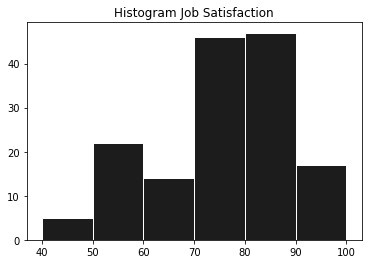

In [65]:
# 1 Obtain a histogram of the Job Satisfaction using the following categories:
# 40%-50%
# 50%-60%
# 60%-70%
# 70%-80%
# 80%-90%
# 90%-100%

JobSatisfaction = data['Job Satisfaction']
plt.hist(JobSatisfaction, bins=[40, 50, 60, 70, 80, 90, 100], color = '#1C1C1C', edgecolor ='white')
plt.title('Histogram Job Satisfaction')
plt.show()

# Partie E Pairwise Scatter plots

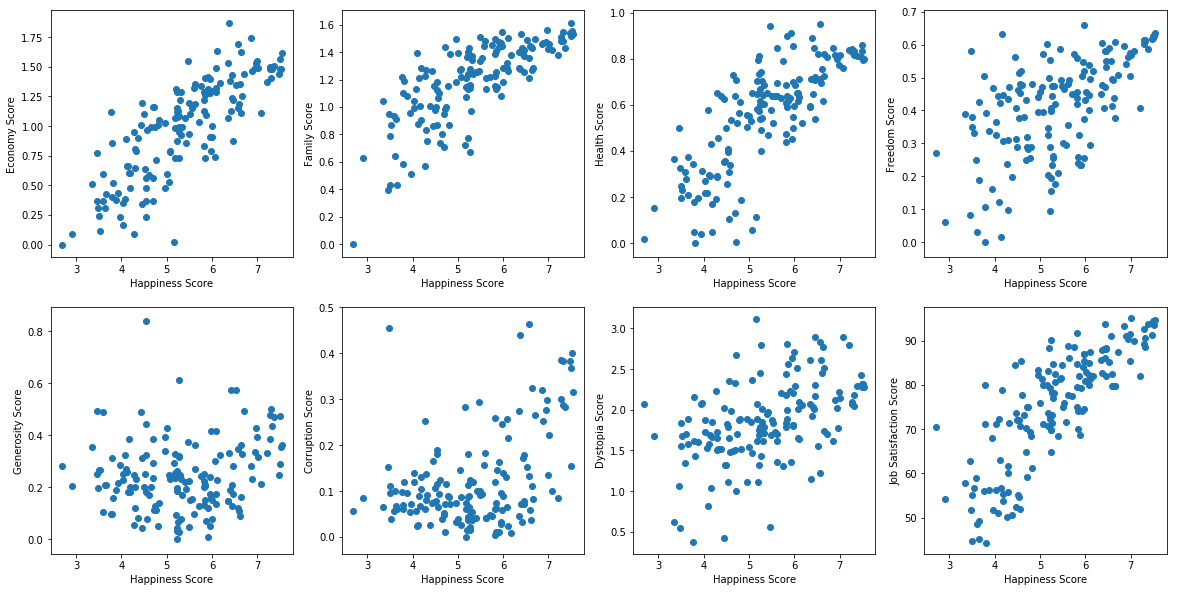

In [108]:
# 1 Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple 
# plots table and obtained with one command as supposed to separate commands for each plot.
xAxis = data['Happiness Score']
fig, ax = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(10)
fig.set_figwidth(20)

ax[0,0].scatter(xAxis, data['Economy'])
ax[0,0].set_xlabel('Happiness Score')
ax[0,0].set_ylabel('Economy Score')

ax[0,1].scatter(xAxis, data['Family'])
ax[0,1].set_xlabel('Happiness Score')
ax[0,1].set_ylabel('Family Score')

ax[0,2].scatter(xAxis, data['Health'])
ax[0,2].set_xlabel('Happiness Score')
ax[0,2].set_ylabel('Health Score')

ax[0,3].scatter(xAxis, data['Freedom'])
ax[0,3].set_xlabel('Happiness Score')
ax[0,3].set_ylabel('Freedom Score')

ax[1,0].scatter(xAxis, data['Generosity'])
ax[1,0].set_xlabel('Happiness Score')
ax[1,0].set_ylabel('Generosity Score')

ax[1,1].scatter(xAxis, data['Corruption'])
ax[1,1].set_xlabel('Happiness Score')
ax[1,1].set_ylabel('Corruption Score')

ax[1,2].scatter(xAxis, data['Dystopia'])
ax[1,2].set_xlabel('Happiness Score')
ax[1,2].set_ylabel('Dystopia Score')

ax[1,3].scatter(xAxis, data['Job Satisfaction'])
ax[1,3].set_xlabel('Happiness Score')
ax[1,3].set_ylabel('Job Satisfaction Score')

plt.show()

# Partie F Correlation

In [177]:
# 1 Obtain the correlation between the Happiness Score and each of the other variables. 
# Which variable has the highest correlation with the Happiness Score?
columns = list(data.columns[2:10])
Correlation = list()

for index in range(len(list2)):
    Correlation.append(np.corrcoef(xAxis, data[columns[index]])[0, 1])
    
dfCorrelation = pd.DataFrame( {'Variables' : columns, 'Correlation to Happiness Score' : Correlation});
dfCorrelation.set_index('Variables')

,Correlation to Happiness Score
Variables,
Economy,0.808678
Family,0.749612
Health,0.777731
Freedom,0.567948
Generosity,0.164123
Corruption,0.438262
Dystopia,0.481117
Job Satisfaction,0.812873


# Partie G Probabilities

In [191]:
# 1 Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. 
# You will have to use pandas to count the appropriate quantities.

data['Happiness Score']

event = len(data.loc[(data['Happiness Score'] > 6) & (data['Region'] == 'Western Europe'), 'Region'])
outcomeSpace = len(data.loc[data['Happiness Score'] > 6, 'Region'])

Probability = event / outcomeSpace;  Probability

0.38636363636363635

# Partie H Matrices

In [302]:
# 1 Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 
#   values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise. 

listCountry  = data.index
listRegion = data['Region'].unique()
intMatrice = list()

for j in range(len(listRegion)):
    for i in range(len(listCountry)):
        if data['Region'][i] == listRegion[j]:
            intMatrice.append(1)
        else:
            intMatrice.append(0)
matrix = np.array(intMatrice).reshape(len(listRegion), len(listCountry)).T

# TEST with Country = 'Syria', Region = 'Asia-Pacific'
matrix[147,:]
## array([0, 0, 1, 0, 0, 0, 0])

array([0, 0, 1, 0, 0, 0, 0])